# Task - 2


## **Task has been mentioned at the end of this notebook**  

Read this notebook to understand the solutions to `Task - 1`



## 1. Basic Pandas Operations

In [73]:
# Import all the required Libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
# Read the dataset and display the head. You will get the output as mentioned below

# ______________________________
# ______________________________
df = pd.read_csv('train.csv')
df.tail()

,Unnamed: 0,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
9995,5203,5204,C3,13,Owned,Joint,47,40,Yes,X5,NaN,NaN,19,27840.0,1
9996,35448,35449,C5,1477,Rented,Individual,34,34,No,NaN,6,1.0,4,10560.0,0
9997,47253,47254,C1,2357,Owned,Individual,64,64,No,X1,8,2.0,19,14716.0,0
9998,42544,42545,C1,1443,Rented,Individual,53,53,No,X5,14+,3.0,13,11664.0,0
9999,7864,7865,C7,1476,Owned,Joint,56,47,Yes,X2,14+,3.0,10,28752.0,0


In [75]:
# Check the shape of the dataframe

# ______________________________
# ______________________________
df.shape

(10000, 15)

In [76]:
# On the dataframe apply info() function and observe the Dtypes and Missing Values

# ______________________________
# ______________________________
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10000 non-null  int64  
 1   ID                       10000 non-null  int64  
 2   City_Code                10000 non-null  object 
 3   Region_Code              10000 non-null  int64  
 4   Accomodation_Type        10000 non-null  object 
 5   Reco_Insurance_Type      10000 non-null  object 
 6   Upper_Age                10000 non-null  int64  
 7   Lower_Age                10000 non-null  int64  
 8   Is_Spouse                10000 non-null  object 
 9   Health Indicator         7671 non-null   object 
 10  Holding_Policy_Duration  5946 non-null   object 
 11  Holding_Policy_Type      5946 non-null   float64
 12  Reco_Policy_Cat          10000 non-null  int64  
 13  Reco_Policy_Premium      10000 non-null  float64
 14  Response               

In [77]:
df1.head()

,ID,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,City_Code,Health Indicator,Holding_Policy_Duration
4,30517,1510,1,0,4,4,1,4.0,17,23673.0,0,2,1,14
15,26582,1523,1,0,5,4,1,3.0,18,28940.8,0,6,1,14
20,27894,3288,1,0,3,2,1,3.0,5,25728.0,0,11,2,13
25,48712,1964,0,0,5,2,1,3.0,19,21087.0,0,15,1,14
26,34194,1673,1,0,6,6,1,4.0,22,28896.0,0,2,2,14


## 2. Cleaning the Data

In [78]:
# Impute the Null values in Health Indicator, Holding_Policy_Duration and Holding_Policy_Type

# ____________________________

# ____________________________
cateogry_columns=df.select_dtypes(include=['object']).columns.tolist()
integer_columns=df.select_dtypes(include=['int64','float64']).columns.tolist()

# ____________________________
for column in df:
    if column=="Holding_Policy_Type":
        pass
    else:
        if df[column].isnull().any():
            if(column in cateogry_columns):
                df[column]=df[column].fillna(df[column].mode()[0])
            else:
                df[column]=df[column].fillna(df[column].mean())

In [79]:
df['Holding_Policy_Type'].value_counts()
df['Holding_Policy_Type']=df['Holding_Policy_Type'].fillna(3.0)

In [80]:
# Check again Holding_Policy_Duration is in object column convert that into int

# ____________________________
df=df.replace({'Holding_Policy_Duration':{'NaN':"14+"}},regex=True)
df['Holding_Policy_Duration']=df['Holding_Policy_Duration'].str.replace("+","")
df['Holding_Policy_Duration'].astype(str).astype(int)

<ipython-input-80-41df0525c10d>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Holding_Policy_Duration']=df['Holding_Policy_Duration'].str.replace("+","")


0       14
1       10
2        3
3        1
4       14
        ..
9995    14
9996     6
9997     8
9998    14
9999    14
Name: Holding_Policy_Duration, Length: 10000, dtype: int32

In [81]:
# Observe that ['Accomodation_Type','Reco_Insurance_Type','Is_Spouse'] 
# above these Object columns have two values - Yes and No


# ____________________________
# ____________________________
print('Accomodation_Type : ',df['Accomodation_Type'].unique())
print('Reco_Insurance_Type : ',df['Reco_Insurance_Type'].unique())
print('Is_Spouse : ',df['Is_Spouse'].unique())

Accomodation_Type :  ['Owned' 'Rented']
Reco_Insurance_Type :  ['Individual' 'Joint']
Is_Spouse :  ['No' 'Yes']


In [82]:
# Converting all the Yes to 1 and No to 0. 



# Write a for loop to iterate over the list given above
# For each feature use pandas 'apply()' to convert all the 'Yes' to 1 and 'No' to 0


# ______________________________
# ______________________________
df['Accomodation_Type'].replace(('Owned','Rented'), (1, 0), inplace=True)
df['Reco_Insurance_Type'].replace(('Individual','Joint'), (1, 0), inplace=True)
df['Is_Spouse'].replace(('Yes', 'No'), (1, 0), inplace=True)

In [83]:
# Now again having a look at all those columns to see if everything went well

# _________________________________
df

,Unnamed: 0,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,27385,27386,C3,64,1,1,36,36,0,X1,14,2.0,16,13320.0,0
1,33499,33500,C3,2955,1,1,66,66,0,X6,10,1.0,19,16152.0,0
2,7997,7998,C1,1542,0,1,24,24,0,X1,3,1.0,16,7310.0,0
3,33032,33033,C26,772,0,1,75,75,0,X1,1,3.0,16,15792.0,0
4,30516,30517,C2,1510,1,0,59,58,1,X1,14,4.0,17,23673.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5203,5204,C3,13,1,0,47,40,1,X5,14,3.0,19,27840.0,1
9996,35448,35449,C5,1477,0,1,34,34,0,X1,6,1.0,4,10560.0,0
9997,47253,47254,C1,2357,1,1,64,64,0,X1,8,2.0,19,14716.0,0
9998,42544,42545,C1,1443,0,1,53,53,0,X5,14,3.0,13,11664.0,0


In [84]:
# Observe that all those columns are now converted from Object to Int64

# ________________________________
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10000 non-null  int64  
 1   ID                       10000 non-null  int64  
 2   City_Code                10000 non-null  object 
 3   Region_Code              10000 non-null  int64  
 4   Accomodation_Type        10000 non-null  int64  
 5   Reco_Insurance_Type      10000 non-null  int64  
 6   Upper_Age                10000 non-null  int64  
 7   Lower_Age                10000 non-null  int64  
 8   Is_Spouse                10000 non-null  int64  
 9   Health Indicator         10000 non-null  object 
 10  Holding_Policy_Duration  10000 non-null  object 
 11  Holding_Policy_Type      10000 non-null  float64
 12  Reco_Policy_Cat          10000 non-null  int64  
 13  Reco_Policy_Premium      10000 non-null  float64
 14  Response               

In [85]:
# Checking all the Object Dtypes - Here, these columns have more than 2 categories

# ______________________________
# ______________________________
df.select_dtypes(include=['object']).columns.tolist()

['City_Code', 'Health Indicator', 'Holding_Policy_Duration']

In [86]:
# You can also do this to separate Object columns

# ____________________________
cat_col = df.select_dtypes(include=['object'])
cat_col

,City_Code,Health Indicator,Holding_Policy_Duration
0,C3,X1,14
1,C3,X6,10
2,C1,X1,3
3,C26,X1,1
4,C2,X1,14
...,...,...,...
9995,C3,X5,14
9996,C5,X1,6
9997,C1,X1,8
9998,C1,X5,14


In [87]:
# Lets just try to see what is happening Response. Check the output.
cat_col

,City_Code,Health Indicator,Holding_Policy_Duration
0,C3,X1,14
1,C3,X6,10
2,C1,X1,3
3,C26,X1,1
4,C2,X1,14
...,...,...,...
9995,C3,X5,14
9996,C5,X1,6
9997,C1,X1,8
9998,C1,X5,14


In [88]:
# Dropping unknown column

# Write the code here to drop unknown column and check dataframe shape
# ______________________________
# ______________________________
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.shape

(10000, 14)

In [89]:
# Getting all the Object Dtypes

# _______________________________
cat_col.head()

,City_Code,Health Indicator,Holding_Policy_Duration
0,C3,X1,14
1,C3,X6,10
2,C1,X1,3
3,C26,X1,1
4,C2,X1,14


In [90]:
cat_col['City_Code'].replace(('C3','C1','C26','C2','C17','C4' ,'C16', 'C9','C23','C21','C6','C7','C11','C22','C15','C13', 'C8','C35','C29','C33','C10','C12', 'C19', 'C5' ,'C18','C14','C24','C27','C20','C34','C36','C25','C28','C32','C30','C31'), (3,1,26,2,17,4,16,9,23,21,6,7,11,22,15,13,8,35,29,33,10,12,19,5,18,14,24,27,20,34,36,25,28,32,30,31), inplace=True)
cat_col['Health Indicator'].replace(('X1','X6','X4','X2','X3','X5','X8','X7','X9'), (1,6,4,2,3,5,8,7,9), inplace=True)
cat_col['Holding_Policy_Duration'].replace(('14','10','3','1','7','13','9','8','2','4','5','11','6','12'), (14,10,3,1,7,13,9,8,2,4,5,11,6,12), inplace=True)

C:\Users\dell\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [91]:
df = pd.concat([df, cat_col], axis=1)
df

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,City_Code,Health Indicator,Holding_Policy_Duration
0,27386,C3,64,1,1,36,36,0,X1,14,2.0,16,13320.0,0,3,1,14
1,33500,C3,2955,1,1,66,66,0,X6,10,1.0,19,16152.0,0,3,6,10
2,7998,C1,1542,0,1,24,24,0,X1,3,1.0,16,7310.0,0,1,1,3
3,33033,C26,772,0,1,75,75,0,X1,1,3.0,16,15792.0,0,26,1,1
4,30517,C2,1510,1,0,59,58,1,X1,14,4.0,17,23673.0,0,2,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5204,C3,13,1,0,47,40,1,X5,14,3.0,19,27840.0,1,3,5,14
9996,35449,C5,1477,0,1,34,34,0,X1,6,1.0,4,10560.0,0,5,1,6
9997,47254,C1,2357,1,1,64,64,0,X1,8,2.0,19,14716.0,0,1,1,8
9998,42545,C1,1443,0,1,53,53,0,X5,14,3.0,13,11664.0,0,1,5,14


In [92]:
# Drop all the unwanted columns.


# _______________________________
df = df.select_dtypes(exclude=['object'])
df

,ID,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,City_Code,Health Indicator,Holding_Policy_Duration
0,27386,64,1,1,36,36,0,2.0,16,13320.0,0,3,1,14
1,33500,2955,1,1,66,66,0,1.0,19,16152.0,0,3,6,10
2,7998,1542,0,1,24,24,0,1.0,16,7310.0,0,1,1,3
3,33033,772,0,1,75,75,0,3.0,16,15792.0,0,26,1,1
4,30517,1510,1,0,59,58,1,4.0,17,23673.0,0,2,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5204,13,1,0,47,40,1,3.0,19,27840.0,1,3,5,14
9996,35449,1477,0,1,34,34,0,1.0,4,10560.0,0,5,1,6
9997,47254,2357,1,1,64,64,0,2.0,19,14716.0,0,1,1,8
9998,42545,1443,0,1,53,53,0,3.0,13,11664.0,0,1,5,14


## Perform Exploratory Data Analysis

**To Do:**
1. Perform Univaraite Analysis (Basic pandas statistical description)
2. Perform Bivaraite Analysis (Pandas Cross Tabs)
3. Visualisations - 
    * Univariate - Histograms, boxplot, PDFs, countplot, etc
    * Bivariate - Scatterplot, Boxplots, Pairplot, etc
4. Write proper observations after each plot
5. At the end of the notebook, summarize it with all the best observations you got.

### City Code
#### Lets see the number of cities and see how many customers are there

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


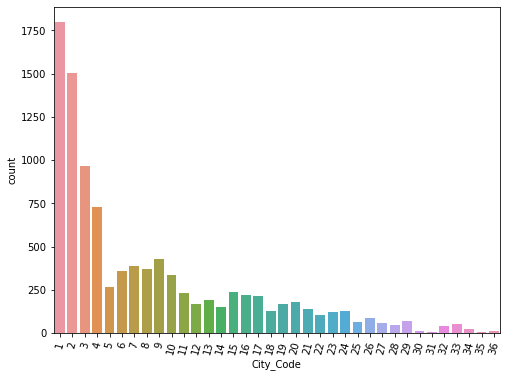

In [93]:
# _____________________________________
# _____________________________________
#print("Total number of cities : ",len(df['City_Code'].unique()))
#print()
#print("Number of customers in each city :")
#df['City_Code'].value_counts()
plt.figure(figsize=(8,6))
sns.countplot(df['City_Code'])
plt.xticks(rotation=75)
plt.show()

> Observation :- We can clearly see that majority of customers belongs to City 1 and city 2.

#### Let's see city-wise customers interests in recommended policy

df.groupby(['City_Code'])['Reco_Policy_Cat'].value_counts()

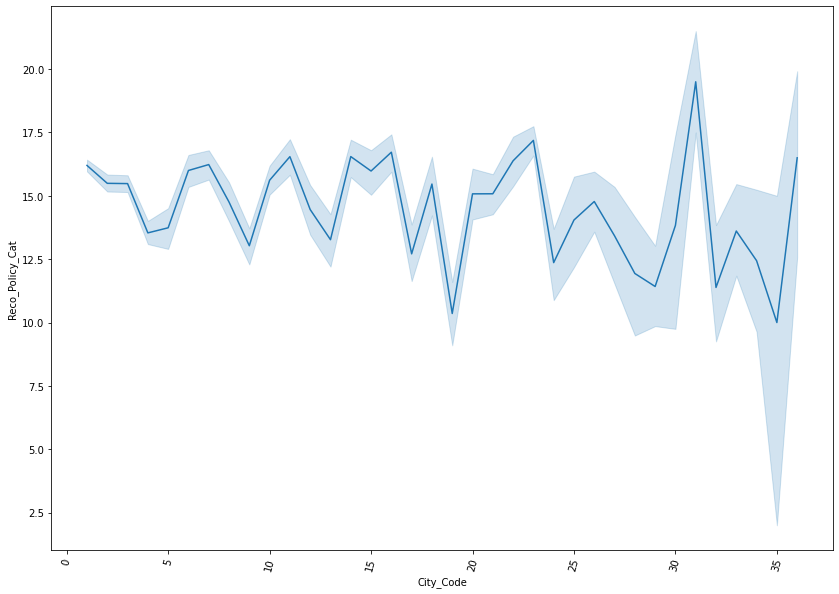

In [94]:
# _____________________________________
# _____________________________________
#df.groupby(['City_Code'])['Reco_Policy_Cat'].value_counts()
plt.figure(figsize=(14,10))
sns.lineplot(x= df['City_Code'], y= df['Reco_Policy_Cat'])
plt.xticks(rotation=75)
plt.show()

> observation :- We can clarly see that customers have given great response to recommended policy.

### Region Code
#### Let's see the number of regions and region-wise customer interests in recommended policy.

df.groupby(['Region_Code'])['Reco_Policy_Cat'].value_counts()

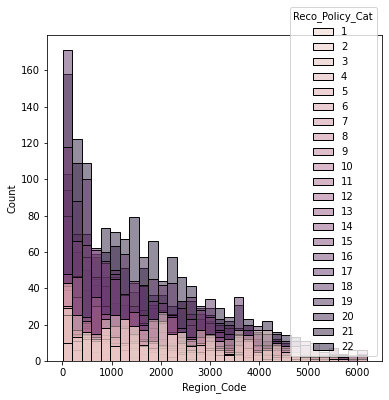

In [95]:
# _____________________________________
# _____________________________________
plt.figure(figsize=(6,6))
sns.histplot(hue= 'Reco_Policy_Cat', x= 'Region_Code', data=df)
plt.show()

> Observation :- Initially people have given more positive response to the recommended policies.

### Accomodation Type
#### Let's see how many customers are living in their own house or rented houseand see how their interests vary in recommended policy.

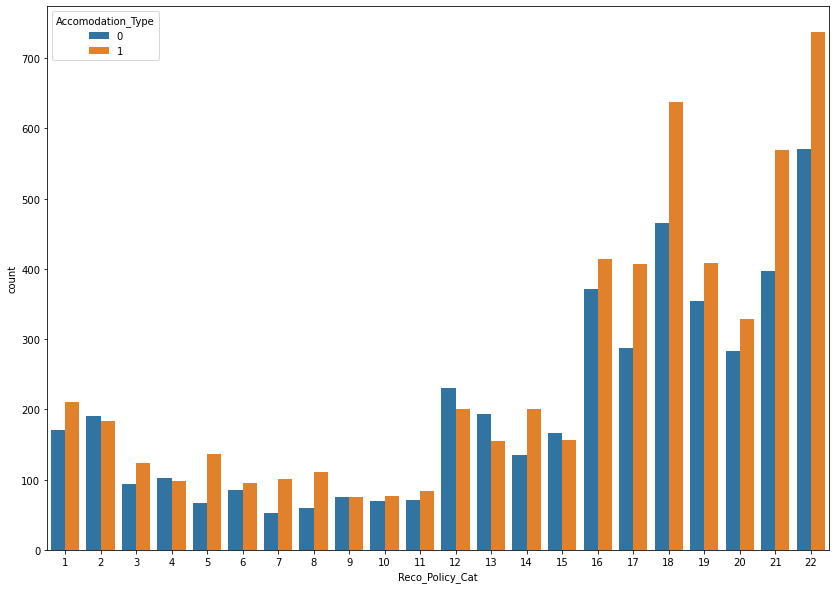

In [96]:
# _____________________________________
# _____________________________________
#df.groupby(['Accomodation_Type'])['Reco_Policy_Cat'].value_counts()
plt.figure(figsize=(14,10))
sns.countplot(x= df['Reco_Policy_Cat'], hue= df['Accomodation_Type'])
plt.show()

> Observation :- We can clearly see that people with owned property have more interest in recommended policy than rented property.

#### Let's see the city-wise accomodation type and customer response

### Reco Insurance Type
#### Let's see the various recommended insurance types and customer response to them.

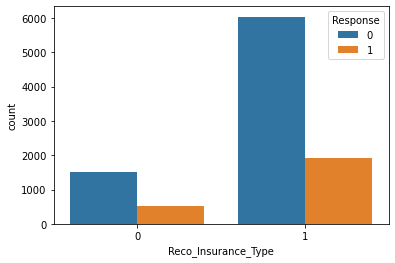

In [97]:
# _____________________________________
# _____________________________________
#df1=df.groupby('Reco_Insurance_Type')['Response'].value_counts()
plt.figure(figsize=(6,4))
sns.countplot(x='Reco_Insurance_Type', hue='Response', data=df)
plt.show()

> Observation :- Mostly people have given positive response to both the policies Joint or Individual.

#### Let's see customers accommodation, recommended insurance type and customer responses.

# _____________________________________
# _____________________________________
df1 = df.groupby(['Accomodation_Type','Reco_Insurance_Type'])['Response'].value_counts()
df1

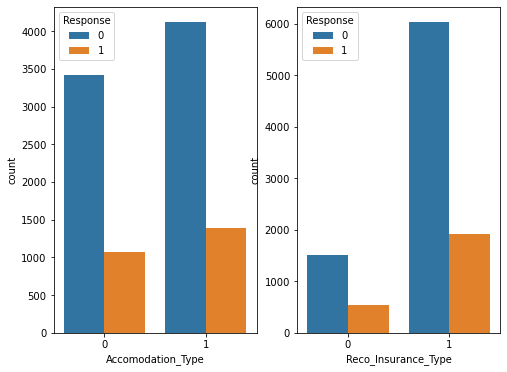

In [98]:
#plt.bar(x=df['Accomodation_Type'], y=df['Reco_Insurance_Type'],color='b',height=1)
#plt.bar(x=df['Accomodation_Type'],y=df['response'],bottom=df['Reco_Insurance_Type'],color='r',height=1)
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.countplot(x ='Accomodation_Type',data=df,hue='Response')
plt.subplot(1,2,2)
sns.countplot(x='Reco_Insurance_Type',data=df,hue='Response')
plt.show()

> Observation :- Both owned and rented houses and Indivudual and joint houses have given positive response.

### Recommended Policy Category
#### Let's see how many categories under the type of recommended policies.

In [99]:
# _____________________________________
# _____________________________________
df['Reco_Policy_Cat'].unique()
#sns.lineplot(df['Reco_Policy_Cat'])

array([16, 19, 17, 21,  9, 18, 13, 15, 14, 22, 20,  5, 12,  6,  4,  1,  3,
       11,  8,  2,  7, 10], dtype=int64)

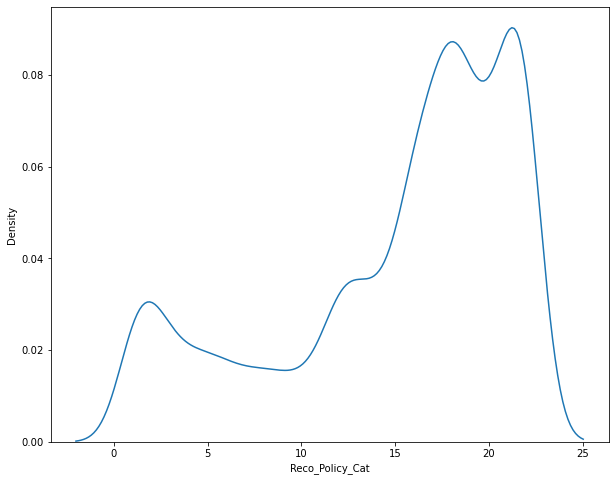

In [100]:
plt.figure(figsize=(10,8))
sns.kdeplot(df.Reco_Policy_Cat)
plt.show()

> Observation :- Mostly people have chosen 15 to 22 recommended policy.

### Recommended Policy Premium
#### Let's see if there is a relationship between the recommended policy premium and recommended policy category.Analyse results with customer's holding policy type and their response to recommended policy.


<AxesSubplot:xlabel='Reco_Policy_Cat', ylabel='Reco_Policy_Premium'>

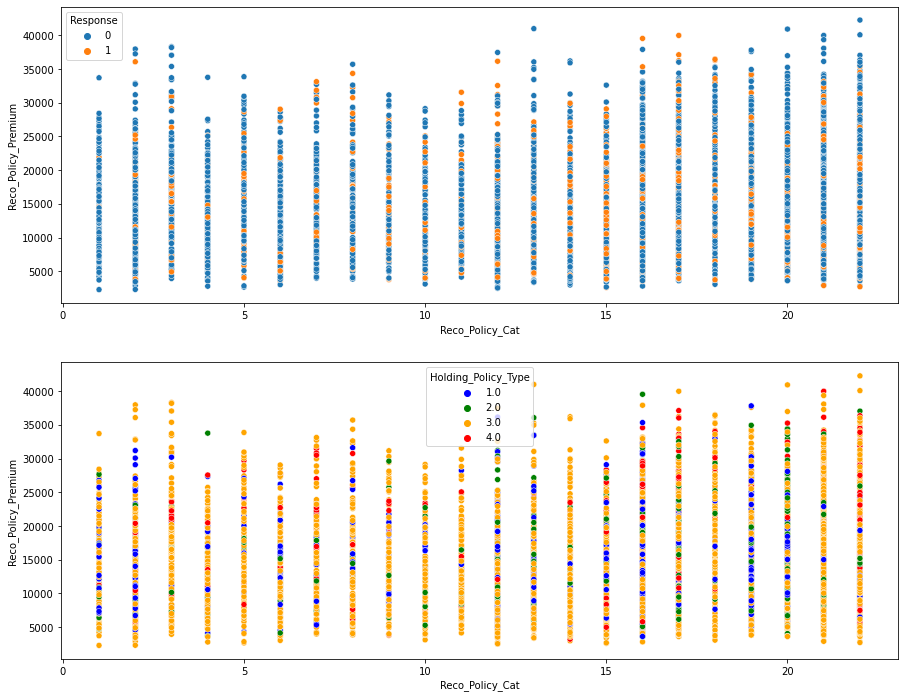

In [101]:
# _____________________________________
# _____________________________________
#sns.barplot(x='Reco_Policy_Cat',y='Reco_Policy_Premium',data = df,hue='Response')
palette={1.0:'blue', 2.0:'green', 3.0:'orange', 4.0:'red'}
plt.figure(figsize=(15,12))
plt.subplot(2,1,1)
sns.scatterplot(x='Reco_Policy_Cat',y='Reco_Policy_Premium',data = df,hue='Response')
plt.subplot(2,1,2)
sns.scatterplot(x='Reco_Policy_Cat',y='Reco_Policy_Premium',data = df,hue='Holding_Policy_Type', palette = palette )

> Observation :- 1-No matter what the policy price is people have choosen recommended policy.<br>
    2- Majority of people belongs to 3.0 holding policy type have preffered recommended policies. and holding policy type 2.0 have preffered the least.

#### Let's see which type of recommnded policy has more number of customers

<AxesSubplot:xlabel='Reco_Policy_Cat', ylabel='count'>

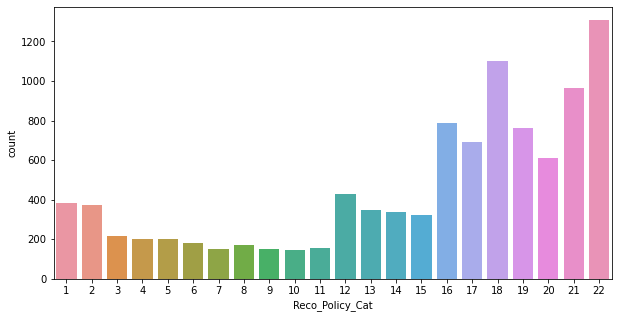

In [102]:
# _____________________________________
# _____________________________________
plt.figure(figsize=(10,5))
sns.countplot(x='Reco_Policy_Cat',data=df)

> Observation :- Policy number 22 has most no. of customers then followed by policy no. 18 and then 21.

#### Let's see city-wise recommended insurance types to customers and theirresponses to recommended policy.


# _____________________________________
# _____________________________________
for i,j in df.groupby(['City_Code','Reco_Insurance_Type']):
    print('City Code :',i[0])
    print('Recomended Ins Type :',i[1])
    print('Response')
    print(j['Response'].value_counts())
    print()
    print()

<AxesSubplot:xlabel='Reco_Insurance_Type', ylabel='City_Code'>

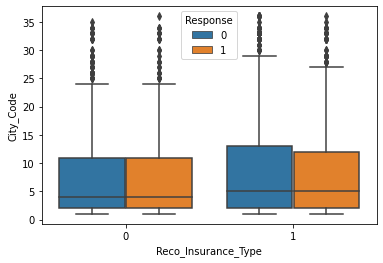

In [103]:
sns.boxplot(x='Reco_Insurance_Type', y='City_Code', hue='Response', data=df)

> Observation :- People have preferred Individual Insurance policy rather than joint Insurance Policy.

#### Let's analyze the customer's upper age with their type of accommodation and recommended policy types to them and also their interest in the recommended policy.


In [104]:
for i in ['Upper_Age','Lower_Age']:
    df.loc[df[i] <= 20, i] = 0
    df.loc[(df[i] > 20) & (df[i] <= 30),i] = 1
    df.loc[(df[i] > 30) & (df[i] <= 40),i] = 2
    df.loc[(df[i] > 40) & (df[i] <= 50),i] = 3
    df.loc[(df[i] > 50) & (df[i] <= 60),i] = 4
    df.loc[(df[i] > 60) & (df[i] <= 70),i] = 5
    df.loc[df[i] > 70, i] = 6

C:\Users\dell\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\dell\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\dell\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

<AxesSubplot:xlabel='Lower_Age', ylabel='Reco_Policy_Cat'>

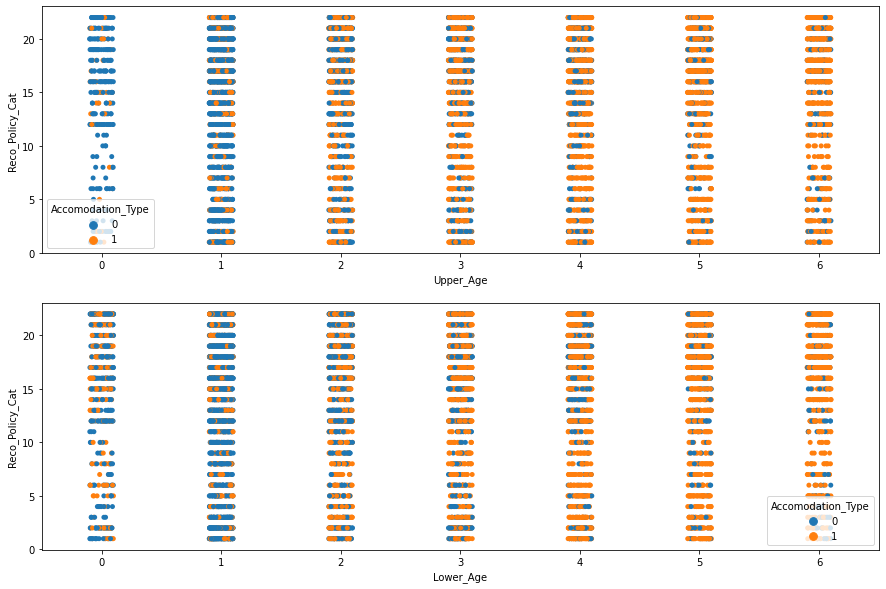

In [105]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.stripplot(x='Upper_Age',y='Reco_Policy_Cat',data = df,hue='Accomodation_Type')
plt.subplot(2,1,2)
sns.stripplot(x='Lower_Age',y='Reco_Policy_Cat',data = df,hue='Accomodation_Type')

> Observation :- People with older has more possibility of living in their own house and younger age people are majorly seen living in rented house.

#### Let's see city-wise the customers who have recommended to take the joint policy with their spouse or with other customers. Check these results with the customer's type of accommodation.


In [106]:
df1=df.loc[(df['Is_Spouse']==1),:]
df2=df.loc[(df['Is_Spouse']==0),:]

<AxesSubplot:xlabel='Accomodation_Type', ylabel='City_Code'>

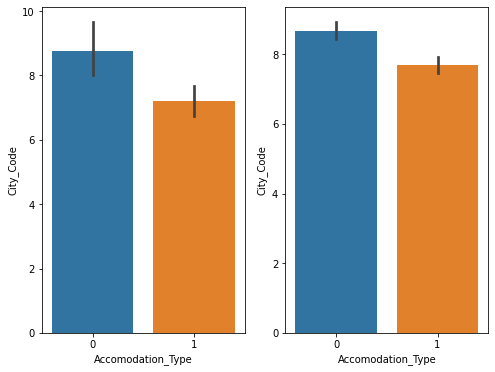

In [107]:
# _____________________________________
# _____________________________________
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.barplot(y='City_Code',data=df1,x='Accomodation_Type')
plt.subplot(1,2,2)
sns.barplot(y='City_Code',data=df2,x='Accomodation_Type')

> Observation :- In both the cases most of people living in rented house.